# NoteBook import and package 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

from matplotlib import cm #color map

from sympy import symbols,diff

from math import log

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A Simple Cost Function 
## $f(x) = x2 + x + 1$

In [52]:
def f(x):
    return x**2 + x + 1

In [53]:
#Make Data
x_1 = np.linspace(start=-3,stop=3,num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

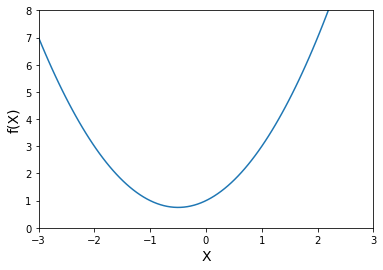

In [56]:
#plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X',fontsize = 14)
plt.ylabel('f(X)',fontsize = 14)
plt.plot(x_1,f(x_1))
plt.show()


In [5]:
def df(x):
    return 2*x + 1

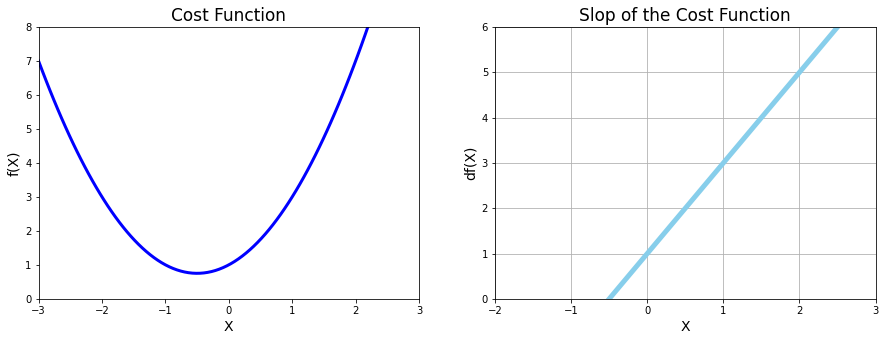

In [61]:
#plot function and derivative side by side

plt.figure(figsize=[15,5])

#chart 1

plt.subplot(1,2,1)
plt.title("Cost Function", fontsize=17)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X',fontsize = 14)
plt.ylabel('f(X)',fontsize = 14)
plt.plot(x_1,f(x_1),color="blue",linewidth=3)

#chart 2

plt.subplot(1,2,2)
plt.title("Slop of the Cost Function", fontsize=17)
plt.grid()
plt.xlim(-2,3)
plt.ylim(0,6)
plt.xlabel('X',fontsize = 14)
plt.ylabel('df(X)',fontsize = 14)
plt.plot(x_1,df(x_1),color="skyblue",linewidth=5)

plt.show()

## Python Loops and Gradient Decent


In [7]:
#python for loops
for n in range(5):
    print('Hello world',n)

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4


In [8]:
#python while loops
counter = 0
while counter<=7:
    print('Counting...',counter)
    counter+=1 
print('Ready or not i am comming!')


Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6
Counting... 7
Ready or not i am comming!


In [62]:
#Gradient Descent
new_x = 3
previous_x = 0;
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('loop run this many times',n)
        break
    
    
print("local minimum occurs at:", new_x)
print('slope or df(x) value at this point is : ', df(new_x))
print('f(x) value or cost at this point is: ',f(new_x))

loop run this many times 40
local minimum occurs at: -0.49962781616118024
slope or df(x) value at this point is :  0.0007443676776395236
f(x) value or cost at this point is:  0.7500001385208099


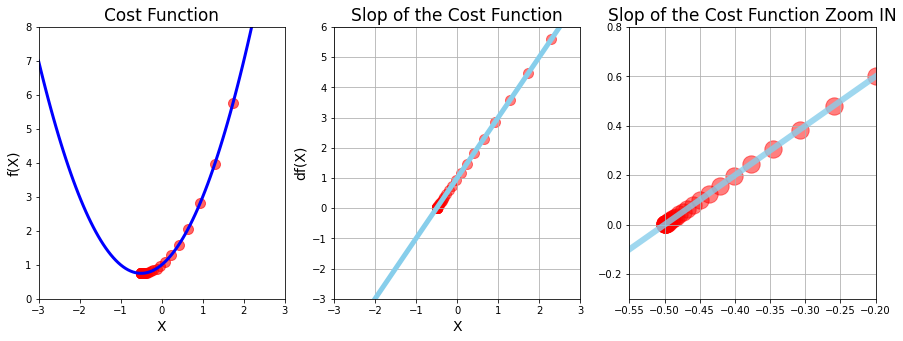

In [63]:
#superimpose the gradient descent calculations on plot

plt.figure(figsize=[15,5])

#chart 1
plt.subplot(1,3,1)
plt.title("Cost Function", fontsize=17)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X',fontsize = 14)
plt.ylabel('f(X)',fontsize = 14)
plt.plot(x_1,f(x_1),color="blue",linewidth=3)

values = np.array(x_list)
plt.scatter(x_list,f(values),color='red',s=100,alpha=0.6)

#chart 2
plt.subplot(1,3,2)
plt.title("Slop of the Cost Function", fontsize=17)
plt.grid()
plt.xlim(-3,3)
plt.ylim(-3,6)
plt.xlabel('X',fontsize = 14)
plt.ylabel('df(X)',fontsize = 14)
plt.plot(x_1,df(x_1),color="skyblue",linewidth=5)

plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.5)

#chart 2 zoon In
plt.subplot(1,3,3)
plt.title("Slop of the Cost Function Zoom IN", fontsize=17)
plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.plot(x_1,df(x_1),color="skyblue",linewidth=6,alpha=0.8)

plt.scatter(x_list,slope_list,color='red',s=300,alpha=0.5)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions 
## $$g(x) = x`4 - 4x`2 + 5$$

In [11]:
#Make some data
x_2 = np.linspace(-2,2,1000)
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x

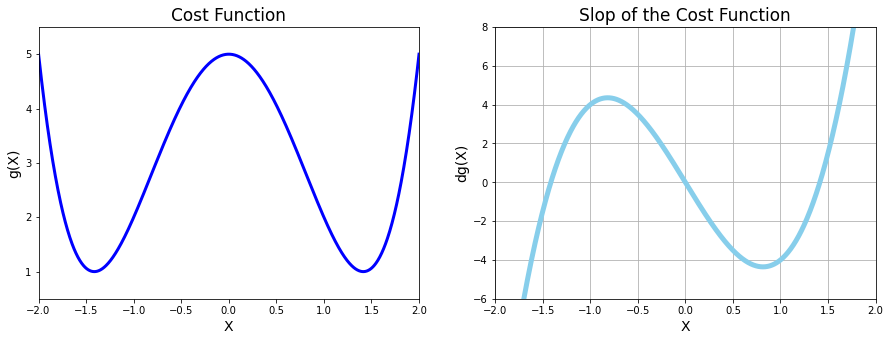

In [12]:
#plot function and derivative side by side

plt.figure(figsize=[15,5])

#chart 1

plt.subplot(1,2,1)
plt.title("Cost Function", fontsize=17)
plt.xlim([-2,2])
plt.ylim(0.5,5.5)
plt.xlabel('X',fontsize = 14)
plt.ylabel('g(X)',fontsize = 14)
plt.plot(x_2,g(x_2),color="blue",linewidth=3)

#chart 2
plt.subplot(1,2,2)
plt.title("Slop of the Cost Function", fontsize=17)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X',fontsize = 14)
plt.ylabel('dg(X)',fontsize = 14)

plt.plot(x_2,dg(x_2),color="skyblue",linewidth=5)
plt.show()

## Gradient Descent as  a python Function

In [13]:
def gradient_descent(derivative_func,initial_guess,multiplier=0.02,precision=0.001,max_iter=300):
    new_x = initial_guess
    
    x_list = [new_x]
    
    slope_list = [derivative_func(new_x)]
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x,x_list,slope_list
       

In [14]:
local_min,list_x,deriv_list = gradient_descent(derivative_func=dg,initial_guess=-0.5,multiplier=0.02,precision=0.001)
print("Local Min occurs at",local_min)
print('Number of step:',len(list_x))

Local Min occurs at -1.4122375085019094
Number of step: 23


In [15]:
local_min,list_x,deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print("Local Min occurs at",local_min)
print('Number of step:',len(list_x))

Local Min occurs at -1.4120887490901561
Number of step: 34


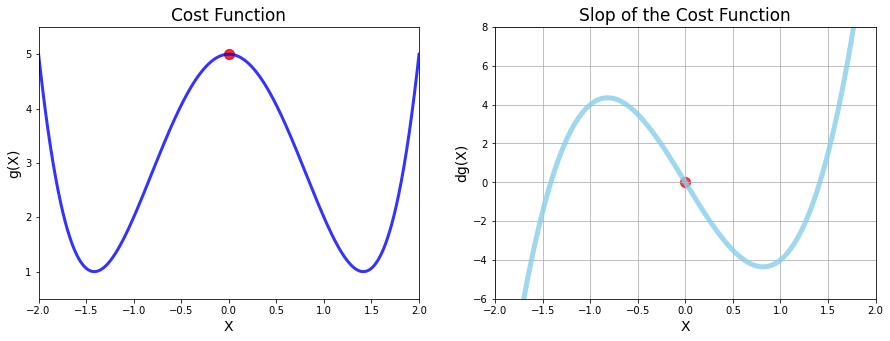

In [16]:
#Calling Gradient Descent Function
local_min,list_x,deriv_list = gradient_descent(derivative_func=dg,initial_guess= 0)

#plot function and derivative side by side

plt.figure(figsize=[15,5])

#chart 1

plt.subplot(1,2,1)
plt.title("Cost Function", fontsize=17)
plt.xlim([-2,2])
plt.ylim(0.5,5.5)
plt.xlabel('X',fontsize = 14)
plt.ylabel('g(X)',fontsize = 14)
plt.plot(x_2,g(x_2),color="blue",linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)

#chart 2

plt.subplot(1,2,2)
plt.title("Slop of the Cost Function", fontsize=17)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X',fontsize = 14)
plt.ylabel('dg(X)',fontsize = 14)

plt.plot(x_2,dg(x_2),color="skyblue",linewidth=5,alpha=0.8)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.show()

# Example-3 : Divergence, overflow and python Tuples
## $$h(x)=x5-2x4+2$$

In [17]:
#Making Data
x_3 = np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x) :
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3


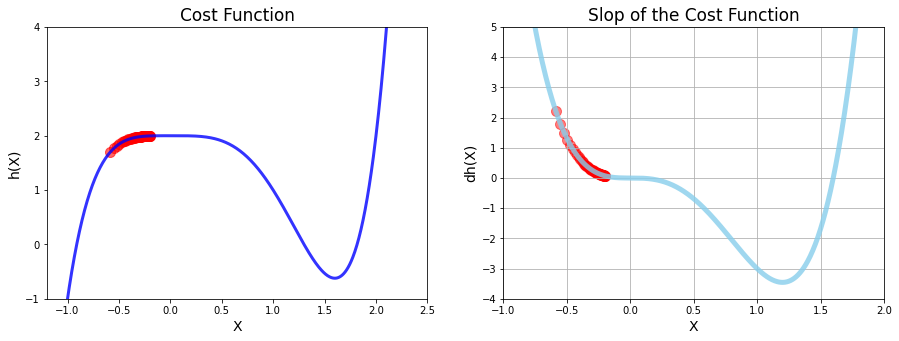

Local Min Occurs at -0.5868677848242464
The cost at this minimus is 1.693143509679783
Number of Step 61


In [18]:
#Calling Gradient Descent Function
local_min,list_x,deriv_list = gradient_descent(derivative_func=dh,initial_guess= -0.2,max_iter=60)

#plot function and derivative side by side

plt.figure(figsize=[15,5])

#chart 1

plt.subplot(1,2,1)
plt.title("Cost Function", fontsize=17)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
 
plt.xlabel('X',fontsize = 14)
plt.ylabel('h(X)',fontsize = 14)
plt.plot(x_3, h(x_3),color="blue",linewidth=3,alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)),color='red',s=100,alpha=0.6)

#chart 2

plt.subplot(1,2,2)
plt.title("Slop of the Cost Function", fontsize=17)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('X',fontsize = 14)
plt.ylabel('dh(X)',fontsize = 14)

plt.plot(x_3,dh(x_3),color="skyblue",linewidth=5,alpha=0.8)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.show()

print('Local Min Occurs at',local_min)
print('The cost at this minimus is',h(local_min))
print('Number of Step',len(list_x))

In [19]:
type(local_min)

float

In [20]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
# sys.float_info.max

# Python Tuples

In [21]:
breakfast = 'Bacon','Tea','Bread'
unlucky_number = 2,4,5,6
print("I Looooove", breakfast[0])
print('My House has no ' + str(unlucky_number[1]) +'th floor')
not_my_address = 1,'infinite loop','cupertino',98839

tuples_with_single_value = 1,
type(tuples_with_single_value)

main,side,greens = breakfast
print('main course is',main)
print('main course is',side)

data_tuple = gradient_descent(derivative_func=dh,initial_guess=0.2)
print('Local Min is', data_tuple[0])
print('cost at the last X values is',h(data_tuple[0]))
print('Number of step is', len(data_tuple[1]))

I Looooove Bacon
My House has no 4th floor
main course is Bacon
main course is Tea
Local Min is 1.5989534547394717
cost at the last X values is -0.6214287992331258
Number of step is 117


# The Learning Rate

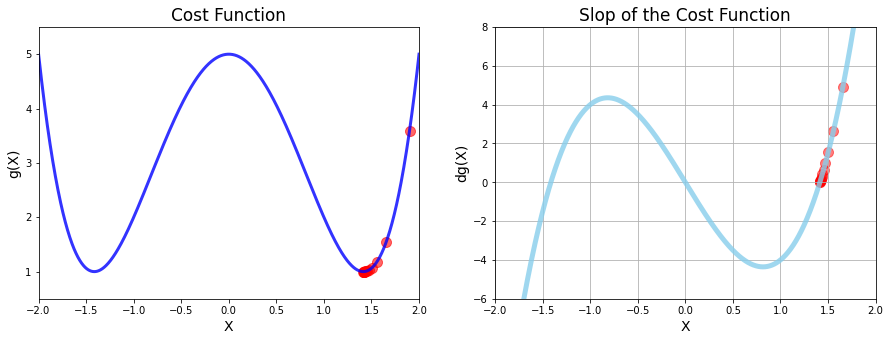

The Number of steps is :  14


In [22]:
#Calling Gradient Descent Function
local_min,list_x,deriv_list = gradient_descent(derivative_func=dg,initial_guess= 1.9,multiplier=0.02,max_iter=500)

#plot function and derivative side by side

plt.figure(figsize=[15,5])

#chart 1

plt.subplot(1,2,1)
plt.title("Cost Function", fontsize=17)
plt.xlim([-2,2])
plt.ylim(0.5,5.5)
plt.xlabel('X',fontsize = 14)
plt.ylabel('g(X)',fontsize = 14)
plt.plot(x_2,g(x_2),color="blue",linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)

#chart 2

plt.subplot(1,2,2)
plt.title("Slop of the Cost Function", fontsize=17)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X',fontsize = 14)
plt.ylabel('dg(X)',fontsize = 14)

plt.plot(x_2,dg(x_2),color="skyblue",linewidth=5,alpha=0.8)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.show()

print('The Number of steps is : ', len(list_x))

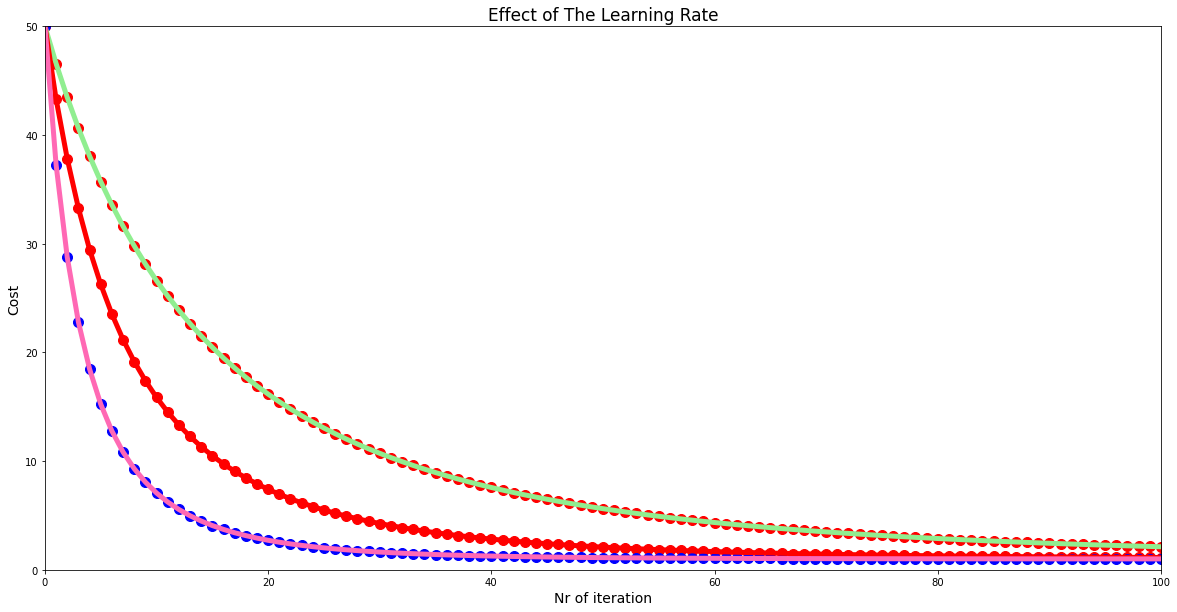

In [23]:
#Calling Gradient Descent Function
n=100
low_gamma = gradient_descent(derivative_func=dg,initial_guess= 3,multiplier=0.0005,max_iter=n,precision=0.0001)
mid_gamma = gradient_descent(derivative_func=dg,initial_guess= 3,multiplier=0.001,max_iter=n,precision=0.0001)
high_gamma = gradient_descent(derivative_func=dg,initial_guess= 3,multiplier=0.002,max_iter=n,precision=0.0001)

#ploting reduction in cost for each iteration
plt.figure(figsize=[20,10])

#chart 1
plt.title("Effect of The Learning Rate", fontsize=17)
plt.xlim(0,n)
plt.ylim(0,50)
plt.xlabel('Nr of iteration',fontsize = 14)
plt.ylabel('Cost',fontsize = 14)

#values for oue charts

# Y-Axis Data: Convert the List to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# X-Axis Data: Create a List From 0 to n + 1
iteration_list = list(range(0,n+1))

#plottong low learning rate
plt.plot(iteration_list,g(low_values),color="lightgreen",linewidth=5)
plt.scatter(iteration_list,g((low_values)),color='red',s=100)

#plottong mid learning rate
plt.plot(iteration_list,g(mid_values),color="red",linewidth=5)
plt.scatter(iteration_list,g((mid_values)),color='red',s=100)

#plottong high learning rate
plt.plot(iteration_list,g(high_values),color="hotpink",linewidth=5)
plt.scatter(iteration_list,g((high_values)),color='blue',s=100)

plt.show()

# Example 4 - Data Viz With 3D Charts
## Minimise $$f(x, y) = \frac{1}{3^{-x^2-y^2}+1}$$

Minimise $$f(x, y) = \frac{1}{r+1}$$ where {r} is $3^{-x^2-y^2}$ 

In [24]:

def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [25]:
#Making the Data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4, y_4 = np.meshgrid(x_4, y_4)

print("Shape of x array is", x_4.shape)

print('Array after meshgrid', x_4.shape)


Shape of x array is (200, 200)
Array after meshgrid (200, 200)


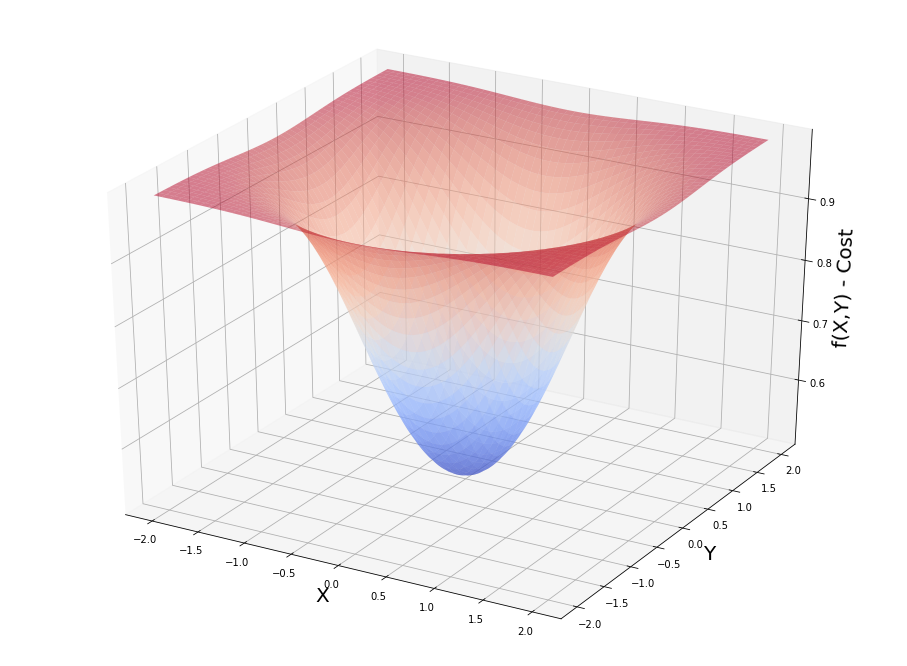

In [26]:
#Making the Map

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection = '3d')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(X,Y) - Cost',fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4),cmap=cm.coolwarm,alpha=0.5)

plt.show()

#

## Partial Derivatives and symbolic Computation

## $$\frac{\partial f} {\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2-y^2}} {\left (3^{-x^2 - y^2} + 1 \right)^2}$$

## $$\frac{\partial f} {\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2-y^2}} {\left (3^{-x^2 - y^2} + 1 \right)^2}$$

In [27]:
a,b = symbols('x, y')
print('The Cost Function is : ',f(a,b))
print('Partial Derivatives with respect to x is : ' , diff(f(a,b),a))
print('Value of f(x,y) at x=1.8 y=1.0 is : ',f(a,b).evalf(subs={a:1.8, b:1.0})) #subs paxi ko - python Dictionary
print('Value of partial derivatives with respect to x is : ',diff(f(a,b),a).evalf(subs={a:1.8, b:1.0}))

The Cost Function is :  1/(3**(-x**2 - y**2) + 1)
Partial Derivatives with respect to x is :  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is :  0.990604794032582
Value of partial derivatives with respect to x is :  0.0368089716197505


## Batch Gardient Descent with simpy

In [28]:
#set up
multiplier = 0.1
max_iter=500
params = np.array([1.8,1.0]) #initital guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradient = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradient
#Result
print('Values in Gradient Arrays',gradient)
print('Minimum occurs at x values of: ', params[0])
print('Minimum occurs at y values of: ', params[1])
print('The COst is : ', f(params[0], params[1]))

Values in Gradient Arrays [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x values of:  3.45838599885832e-11
Minimum occurs at y values of:  1.92132555492129e-11
The COst is :  0.500000000000000


In [29]:
def fpx(x,y):
    r = 3 ** (-x**2 - y ** 2)
    return 2*x*log(3) * r / (r + 1)**2

def fpy(x,y):
    r = 3 ** (-x**2 - y ** 2)
    return 2*y*log(3) * r / (r + 1)**2



In [30]:
#set up
multiplier = 0.1
max_iter=500
params = np.array([1.8,1.0]) #initital guess

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradient = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradient
#Result
print('Values in Gradient Arrays',gradient)
print('Minimum occurs at x values of: ', params[0])
print('Minimum occurs at y values of: ', params[1])
print('The COst is : ', f(params[0], params[1]))

Values in Gradient Arrays [2.01013038e-11 1.11673910e-11]
Minimum occurs at x values of:  3.458385998858304e-11
Minimum occurs at y values of:  1.9213255549212797e-11
The COst is :  0.5


## Graphing 3D Gradient Descent and Adv Numpy Arrays 

In [31]:
#set up
multiplier = 0.1
max_iter=500
params = np.array([1.8,1.0]) #initital guess
values_array = params.reshape(1,2)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradient = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradient
    values_array = np.append(values_array,params.reshape(1,2),axis=0)
#     values_array = np.concatenate((values_array,params.reshape(1,2)),axis=0)
#Result
print('Values in Gradient Arrays',gradient)
print('Minimum occurs at x values of: ', params[0])
print('Minimum occurs at y values of: ', params[1])
print('The COst is : ', f(params[0], params[1]))

Values in Gradient Arrays [2.01013038e-11 1.11673910e-11]
Minimum occurs at x values of:  3.458385998858304e-11
Minimum occurs at y values of:  1.9213255549212797e-11
The COst is :  0.5


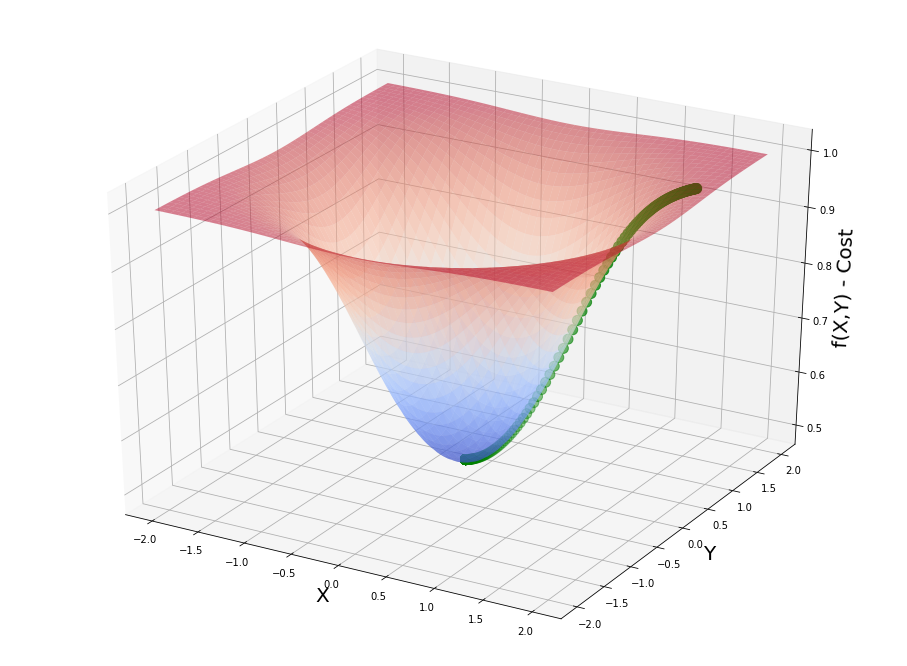

In [32]:
#Making the Map

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection = '3d')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(X,Y) - Cost',fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4),cmap=cm.coolwarm,alpha=0.5)
ax.scatter(values_array[:,0],values_array[:,1],f(values_array[:,0],(values_array[:,1])),s=100,color='green')

plt.show()


In [33]:
# Advance Numpy Array Practice : 
Kirk = np.array([['Captain','Guitar']])
print(Kirk.shape)
hs_band = np.array([['Black Though','MC'],['Questlove','Drums']])
print('hs_band[0]',hs_band[0])
print('hs_band[0][1] : ',hs_band[0][1])
print('hs_band[1][0] : ',hs_band[1][0])

the_roots = np.append(arr=hs_band,values=Kirk,axis=0)
# print(the_roots)
print('Printing the Nickname', the_roots[:,0])

the_roots = np.append(arr=the_roots,values=[['Malok B', 'MC']], axis=0)
print('Printing the brand members roles : ', the_roots[:,1])

(1, 2)
hs_band[0] ['Black Though' 'MC']
hs_band[0][1] :  MC
hs_band[1][0] :  Questlove
Printing the Nickname ['Black Though' 'Questlove' 'Captain']
Printing the brand members roles :  ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - working with data and a real cost function 

## Mean square error a cost function for regression problems

### $$ RSS = \sum_{i=1}^{n}\big(y^{(i)} -h_\theta x^{(i)} \big)^2$$

### $$ MSE = \frac {1} {n} \sum_{i=1}^{n}\big(y^{(i)} -h_\theta x^{(i)} \big)^2$$

### $$ MSE = \frac {1} {n} \sum_{i=1}^{n}\big(y - \hat {y} \big)^2$$

In [34]:
#Making some data for example 5 

x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

print('Shape of x_5 arrays is : ', x_5.shape)
print('Shape of y_5 arrays is : ', y_5.shape)

Shape of x_5 arrays is :  (7, 1)
Shape of y_5 arrays is :  (7, 1)


In [35]:
regr = LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


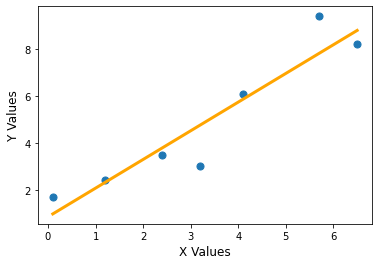

In [36]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),color='orange',linewidth=3)
plt.xlabel('X Values', fontsize=12)
plt.ylabel('Y Values', fontsize=12)
plt.show()

In [37]:
# y_hat = theta 0 + theta 1 * x_5
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print('EST Values y_hat are : \n', y_hat)
print('In Comprasion the actual y values are \n',y_5)

EST Values y_hat are : 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In Comprasion the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [38]:
#challenge 
def mse(y,y_hat):
#     mse_calc = 1/7 * sum((y-y_hat)**2)
    mse_calc = 1/y.size * sum((y-y_hat)**2)
    return mse_calc

In [39]:
mse(y_5,y_hat)

array([0.94796558])

In [40]:
print('Manually Calculated MSE is : ', mse(y_5,y_hat))
print('MSE Regression using manual calc is :  ', mean_squared_error(y_5,y_hat))
print('MSE Regression is  ', mean_squared_error(y_5,regr.predict(x_5)))

Manually Calculated MSE is :  [0.94796558]
MSE Regression using manual calc is :   0.9479655759794577
MSE Regression is   0.9479655759794577


## 3D plot for the MSE cost function
### Make Data for Thetas

In [41]:
# Making the data for thetea
nr_thetas = 200
th_0 = np.linspace(start=-1,stop=3, num = nr_thetas)
th_1 = np.linspace(start=-1,stop=3, num = nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0,th_1)


# clac MSE using nested for loops

In [42]:
plot_cost = np.zeros((nr_thetas,nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i] [j] + plot_t1 [i] [j] * x_5
        plot_cost[i] [j] = mse(y_5,y_hat)
print(' shape of plot_t0',plot_t0.shape)
print(' shape of plot_t1',plot_t1.shape)
print(' shape of plot_cost',plot_cost.shape)

 shape of plot_t0 (200, 200)
 shape of plot_t1 (200, 200)
 shape of plot_cost (200, 200)


# ploting MSE

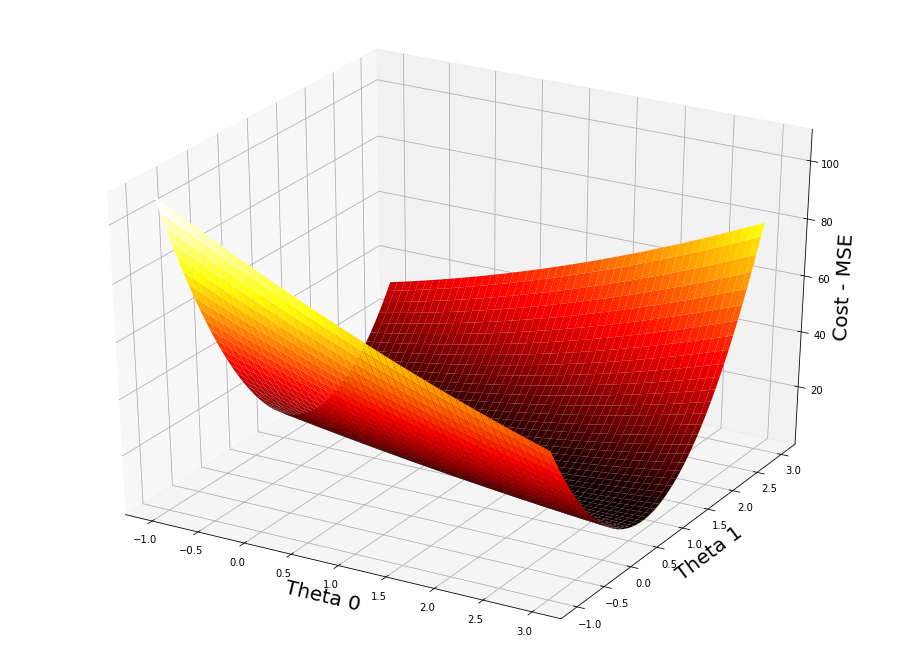

In [43]:
#ploting the 3d 
#Making the Map
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection = '3d')
ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost - MSE',fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost,cmap=cm.hot)

plt.show()


In [44]:
print('Min Value of Plot_Cost',plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin(), shape = plot_cost.shape)
print('Min Occurs at (i,j): ', ij_min)
print('min MSE for theta 0 at plot_t0 [111][91] : ', plot_t0[111][91])
print('min MSE for theta 1 at plot_t1 [111][91] : ', plot_t1[111][91])

Min Value of Plot_Cost 0.9483826526747163
Min Occurs at (i,j):  (111, 91)
min MSE for theta 0 at plot_t0 [111][91] :  0.829145728643216
min MSE for theta 1 at plot_t1 [111][91] :  1.2311557788944723


In [45]:
# clac MSE using nested for loops
for i in range(3):
    for j in range(3):
        print(f'Value of i is {i} and values of j is {j}')

Value of i is 0 and values of j is 0
Value of i is 0 and values of j is 1
Value of i is 0 and values of j is 2
Value of i is 1 and values of j is 0
Value of i is 1 and values of j is 1
Value of i is 1 and values of j is 2
Value of i is 2 and values of j is 0
Value of i is 2 and values of j is 1
Value of i is 2 and values of j is 2


## Partial Derivatives of MSE W.R.T. $\theta_0$ and $\theta_1$ 
## $$\frac{\partial MSE} {\partial \theta_0} = -\frac{2} {n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE} {\partial \theta_1} = -\frac{2} {n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big (x^{(i)} \big)$$

# MSE and Gradient Descent

In [46]:
def grad(x,y,thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]* x)* x)
    
#     return np.array([theta0_slope[0],theta1_slope[0]])
#     return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope,theta1_slope),axis=0)
    

In [47]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

# colect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)
for i in range(1000):
    thetas = thetas - multiplier * grad(x_5,y_5,thetas)
    #append the new values to our numpy array
    plot_vals = np.concatenate((plot_vals,thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values = mse(y_5, thetas[0] + thetas[1] * x_5))
print('Min Occurs at Theta 0 : ', thetas[0])
print('Min Occurs at Theta 1 : ', thetas[1])
print('MSE is : ', mse(y_5, thetas[0] + thetas[1] * x_5))

Min Occurs at Theta 0 :  0.8532230461743415
Min Occurs at Theta 1 :  1.2214935332607393
MSE is :  [0.94797511]


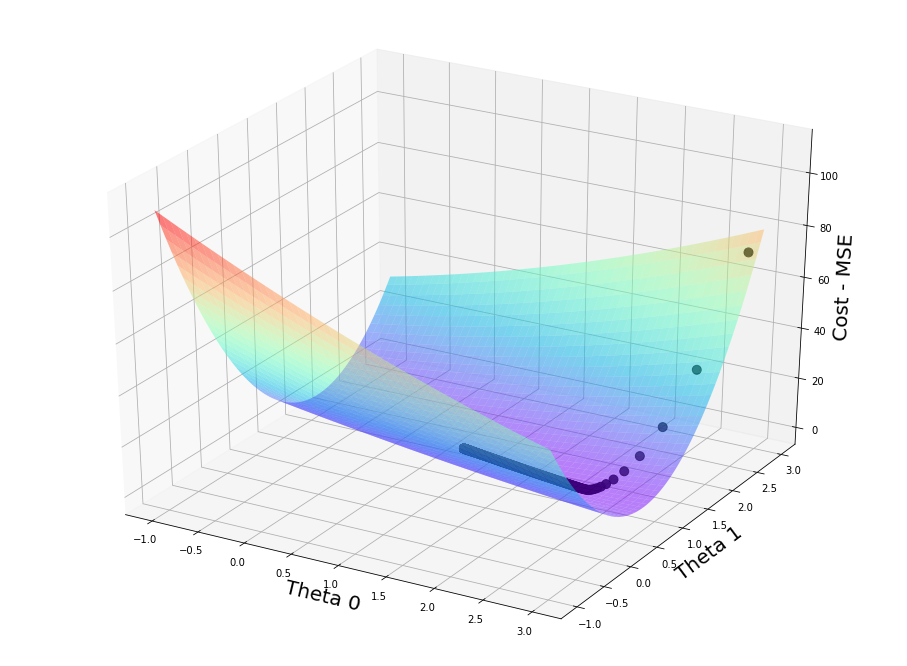

In [48]:
#ploting the 3d 
#Making the Map
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection = '3d')
ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost - MSE',fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost,cmap=cm.rainbow,alpha=0.5)
ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=80,color='black')

plt.show()
